In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


ImportError: cannot import name 'datetime' from 'pandas' (d:\cursor_code\python\Lstm\.venv\Lib\site-packages\pandas\__init__.py)

In [61]:
import datetime
 
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')



In [101]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# # Baca dataset
df = pd.read_csv("./dataset_fixeds.csv")

# # # Ubah kolom timeStamps ke datetime tanpa milidetik
# Set index ke timestamp
df_original = df.copy().drop(columns='timeStamps',axis=1)

df.set_index('timeStamps', inplace=True)

# Buat salinan dari dataframe asli tanpa kolom 'timestamp'

# Sekarang kita pakai asfreq untuk set frekuensi per menit
# df = df.index.asfreq('min')

# Sekarang tambahkan kembali kolom dari df_original ke df_asfreq
# Gunakan merge atau reindex data berdasarkan timestamp yang sudah di asfreq
df['newBitrates'] = df_original['newBitrates']
# # Tambahkan frekuensi setiap detik
# # Tentukan target
target = df["newBitrates"]
# split_index = int(len(target) * 0.7)
# # Split data
# y_train = target.iloc[:split_index]
# y_test = target.iloc[split_index:]
# y_train_clean = y_train.dropna()
# y_test_clean = y_test.dropna()
# Buat ARIMA model
# model = ARIMA(y_train, order=(1,2,3))
# arima_result = model.fit()
# minutes_and_seconds = date_obj.dt.strftime("%M:%S")
# Print hasil
df.index.to_series

<bound method Index.to_series of Index(['2024-09-16T06:11:10.683Z', '2024-09-16T06:11:11.739Z',
       '2024-09-16T06:11:12.812Z', '2024-09-16T06:11:13.867Z',
       '2024-09-16T06:11:14.927Z', '2024-09-16T06:11:15.994Z',
       '2024-09-16T06:11:17.053Z', '2024-09-16T06:11:18.114Z',
       '2024-09-16T06:11:19.176Z', '2024-09-16T06:11:20.249Z',
       ...
       '2024-09-16T06:26:43.442Z', '2024-09-16T06:26:44.497Z',
       '2024-09-16T06:26:45.557Z', '2024-09-16T06:26:46.640Z',
       '2024-09-16T06:26:47.697Z', '2024-09-16T06:26:48.759Z',
       '2024-09-16T06:26:49.824Z', '2024-09-16T06:26:51.951Z',
       '2024-09-16T06:26:53.009Z', '2024-09-16T06:26:54.073Z'],
      dtype='object', name='timeStamps', length=588)>

C:\Users\Bilsyp\AppData\Local\Temp\ipykernel_18836\3205115486.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()  # Interpolasi berdasarkan waktu


In [87]:

model = ARIMA(df["newBitrates"], order=(2,1,2) ,)
arima_result = model.fit()



d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

y_train_clean

In [36]:
y_train_clean

timeStamps
2024-09-16 06:11:10.683000+00:00    14998609.0
2024-09-16 06:12:10.683000+00:00    14998609.0
2024-09-16 06:13:10.683000+00:00    14998609.0
2024-09-16 06:14:10.683000+00:00    14998609.0
2024-09-16 06:15:10.683000+00:00    14998609.0
2024-09-16 06:16:10.683000+00:00    14998609.0
2024-09-16 06:17:10.683000+00:00    14998609.0
2024-09-16 06:18:10.683000+00:00    14998609.0
2024-09-16 06:19:10.683000+00:00    14998609.0
2024-09-16 06:20:10.683000+00:00    14998609.0
2024-09-16 06:21:10.683000+00:00    14998609.0
Freq: min, Name: newBitrates, dtype: float64

In [89]:
predictions = arima_result.forecast(steps=10)
print(predictions)

588    1321829.0
589    1321829.0
590    1321829.0
591    1321829.0
592    1321829.0
593    1321829.0
594    1321829.0
595    1321829.0
596    1321829.0
597    1321829.0
Name: predicted_mean, dtype: float64


d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [77]:
predictions

411    3.386481e+06
412    3.560560e+06
413    3.733443e+06
414    3.891605e+06
415    4.031147e+06
           ...     
606    4.857867e+06
607    4.857867e+06
608    4.857867e+06
609    4.857867e+06
610    4.857867e+06
Name: predicted_mean, Length: 200, dtype: float64

In [105]:
y_test.shape

(284,)

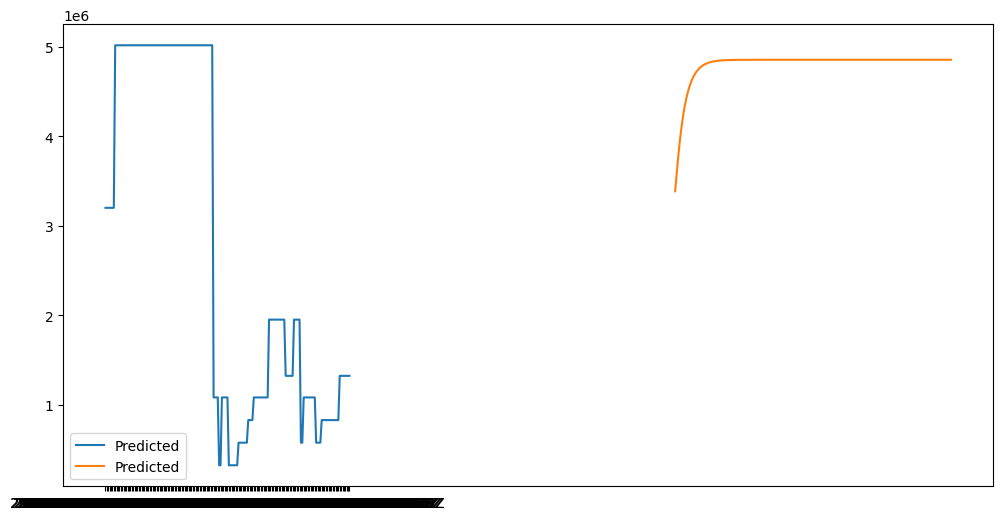

timeStamps
2024-09-16T06:11:10.683Z    14998609
2024-09-16T06:11:11.739Z    14998609
2024-09-16T06:11:12.812Z    14998609
2024-09-16T06:11:13.867Z    14998609
2024-09-16T06:11:14.927Z    14998609
                              ...   
2024-09-16T06:21:21.090Z     3201559
2024-09-16T06:21:22.145Z     3201559
2024-09-16T06:21:24.800Z     3201559
2024-09-16T06:21:25.865Z     3201559
2024-09-16T06:21:26.946Z     3201559
Name: newBitrates, Length: 411, dtype: int64

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(y_test , label='Predicted')
plt.plot(predictions , label='Predicted')
plt.legend()
plt.show()
y_train


In [85]:
# Cek stasioneritas untuk y_train
from statsmodels.tsa.stattools import adfuller

result_train = adfuller(y_train)
print('ADF Statistic (Train):', result_train[0])
print('p-value (Train):', result_train[1])

if result_train[1] > 0.05:
    print("y_train belum stasioner, kita perlu differencing.")
    y_train_diff = y_train.diff().dropna()  # Apply differencing buat bikin stasioner
else:
    print("y_train udah stasioner.")
    y_train_diff = y_train

MissingDataError: exog contains inf or nans